In [7]:
import pandas as pd
import numpy as np
import seaborn as sbn
import statistics
import scanpy as sc
import matplotlib.pyplot as plt
from datetime import datetime

current_date = datetime.now()
formatted_date = current_date.strftime("%Y.%m.%d")

root = '/Users/grantongo/Desktop/nature methods/figures'

In [8]:
df_normalized = pd.read_csv(f"{root}/figure 4/data_df_normalized.csv")
df_normalized.head()

,sample_number,day,plate_number,donor,plate_barcode,row,column,position,cytokine,cytokine_concentration,...,TWEAK,uPA,VCAM-1,VEGF Receptor 2 (Flk-1),VEGF-A (165),VEGF-C,VEGF-D,VEGFR-1,WISP-1 (CCN4),XCL1 (Lymphotactin)
0,28,1,1,1,R-D1-LPS,B,4,B04,control,0,...,0.009970,-0.008528,-0.061781,0.003325,-0.020992,0.021071,-0.002612,-0.010186,-0.026243,0.019833
1,50,1,1,1,R-D1-LPS,C,2,C02,control,0,...,0.018754,0.025184,0.007532,0.012856,0.014249,-0.008398,-0.008256,0.024502,-0.013706,-0.017427
2,54,1,1,1,R-D1-LPS,C,6,C06,control,0,...,-0.023846,0.024760,0.010735,-0.020728,0.043903,0.005564,-0.003886,-0.013819,-0.004508,0.035454
3,80,1,1,1,R-D1-LPS,D,8,D08,control,0,...,-0.038768,-0.000248,-0.033720,-0.004443,0.004828,0.016661,0.024072,0.011148,-0.018199,0.011380
4,101,1,1,1,R-D1-LPS,E,5,E05,control,0,...,0.020521,0.013430,-0.016498,-0.026127,-0.018293,0.014130,0.000051,0.032214,-0.011771,-0.021496


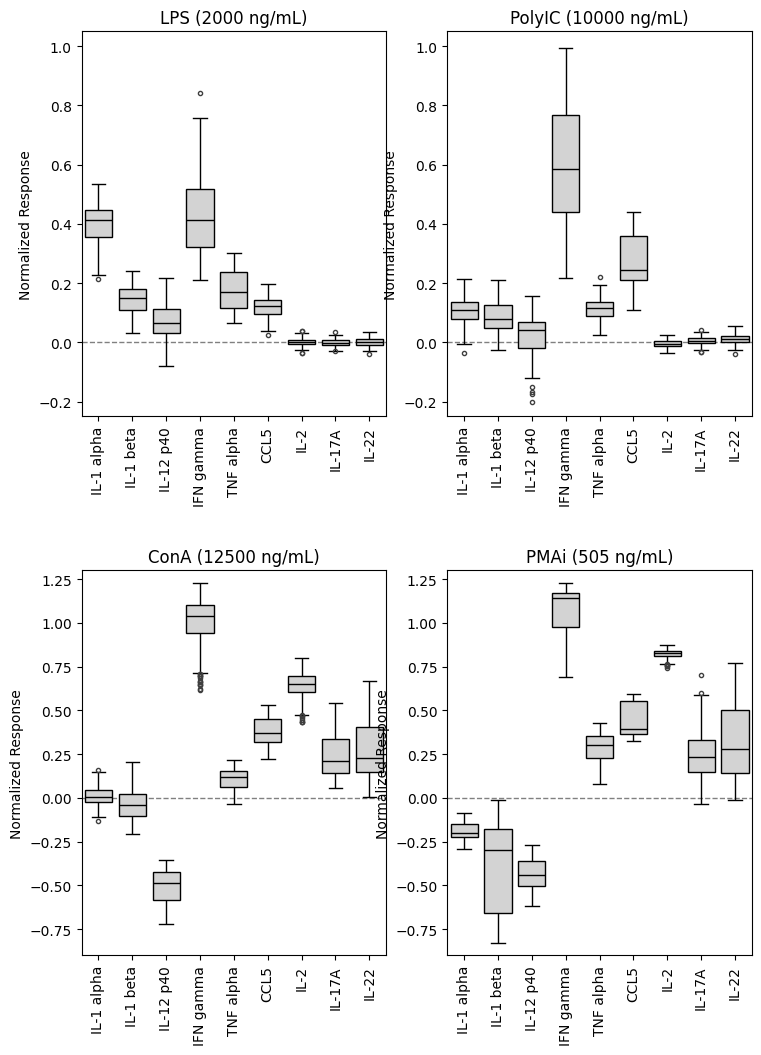

In [9]:
df_melt = df_normalized.melt(value_vars=sensors, 
                             id_vars=['donor','stimulus','stimulus_concentration'],
                             var_name='sensor')
select_sensors = ['IL-1 alpha',
                  'IL-1 beta',
                  'IL-12 p40',
                  'IFN gamma',
                  'TNF alpha',
                  'CCL5',
                  'IL-2',
                  'IL-17A',
                  'IL-22']

fig, ax = plt.subplots(2,2,figsize=(8.65,12), gridspec_kw={'wspace':0.2,'hspace':0.4})
ax = ax.ravel()
for stim, stimconc, i in zip(stims,stimconcs,range(0,len(stims))):
    ax[i] = sbn.boxplot(data=df_melt[(df_melt['stimulus']==stim) &
                                     (df_melt['sensor'].isin(select_sensors))],
                        x='sensor',
                        y='value',
                        ax=ax[i],
                        order=select_sensors,
                        linewidth=1,
                        boxprops=dict(facecolor='lightgrey', edgecolor='black', alpha=1),
                        whiskerprops=dict(color="black"),
                        capprops=dict(color="black"),
                        medianprops=dict(color="black", linewidth=1),
                        flierprops=dict(marker='.', color='black', alpha=1) )
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].set_title(f'{stim} ({stimconc} ng/mL)')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Normalized Response')
    ax[i].axhline(0,color='grey',linestyle='--',linewidth=1,zorder=0)
    if i in [0,1]:
        ax[i].set_ylim(-0.25,1.05)
    else:
        ax[i].set_ylim(-0.9,1.3)
fig.savefig((f'{root}/figure 4/svg_figure.4.d.e_myeloid.vs.tcell.svg'))
fig.savefig((f'{root}/figure 4/png_figure.4.d.e_myeloid.vs.tcell.png'))

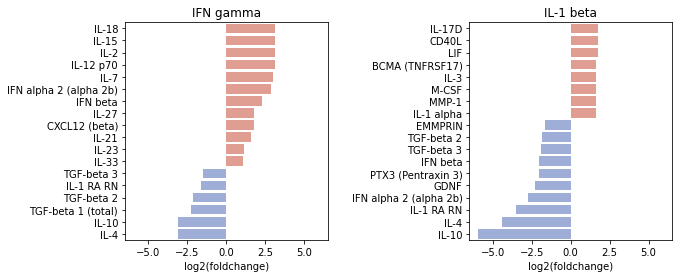

In [25]:
volcano_significant = pd.read_csv(f'{root}/data/pbmc/pbmc_significant_responses_2025.01.16.csv')

df_pivot = pd.pivot_table(volcano_significant[['cytokine','sensor','log2fc']], 
                          values='log2fc',
                          index='cytokine', 
                          columns=['sensor'], 
                          aggfunc='median')
df_pivot = df_pivot.fillna(0)

IFNg = df_pivot['IFN gamma'].sort_values(ascending=False)
IL1b = df_pivot['IL-1 beta'].sort_values(ascending=False)

IFNg = IFNg[abs(IFNg)>1]
IL1b = IL1b[abs(IL1b)>1.6]

fig, ax = plt.subplots(1,2, figsize=(9.8,4), gridspec_kw={'wspace':0.7})
ax = ax.ravel()

ax[0] = sbn.barplot(x=IFNg,
                    y=IFNg.index, 
                    palette = ["#ed9484ff" if v > 0 else "#96aae0ff" for v in IFNg],
                    label='IFN gamma', 
                    ax=ax[0])
ax[0].set_xlim(-6.5, 6.5)
ax[0].set_title('IFN gamma')
ax[0].set_ylabel(None)
ax[0].set_xlabel('log2(foldchange)')

ax[1] = sbn.barplot(x=IL1b,
                    y=IL1b.index, 
                    color='seagreen', 
                    palette = ['#ED9484' if v > 0 else "#96AAE0" for v in IL1b],
                    label='IL-1 beta', 
                    ax=ax[1])
ax[1].set_xlim(-6.5, 6.5)
ax[1].set_title('IL-1 beta')
ax[1].set_ylabel(None)
ax[1].set_xlabel('log2(foldchange)')

fig.savefig((f'{root}/figure 4/png_figure.4.f.g_IFNg.IL1b.foldchange.png'))
fig.savefig((f'{root}/figure 4/svg_figure.4.f.g_IFNg.IL1b.foldchange.svg'))